In [1]:
# core imports

import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
# ML imports

from sklearn.linear_model import LogisticRegression

# import training/testing dataset

training_df = pd.read_csv(Path("Resources/training_dataset.csv"))
testing_df = pd.read_csv(Path("Resources/testing_dataset.csv"))

# split training dataset to X and y

X_train = training_df.drop(columns="status")
y_train = training_df["status"]
display(X_train.tail())

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
97117,-0.219329,-0.190852,-0.203749,-0.182927,-0.186612,-0.058265,-0.209514,-0.165374,-0.206793,-0.227825,-0.243471,-0.153940,-0.202192,-0.213059,-0.052323,-0.206793,-0.235422,-0.200938
97118,-0.222145,-0.179354,-0.199686,-0.178509,-0.188863,-0.055773,-0.211300,-0.166231,-0.198073,-0.225505,-0.240593,-0.149817,-0.201842,-0.209004,-0.045610,-0.198073,-0.232546,-0.191834
97119,-0.192159,-0.181999,-0.191512,-0.154783,-0.172297,-0.032896,-0.190382,-0.125739,-0.194009,-0.213523,-0.244265,-0.121229,-0.182718,-0.208669,-0.029677,-0.194009,-0.232920,-0.191740
97120,-0.221384,-0.189409,-0.203366,-0.180540,-0.186663,-0.055358,-0.210573,-0.166003,-0.205510,-0.227741,-0.243266,-0.150856,-0.201552,-0.211046,-0.050811,-0.205510,-0.234552,-0.199931
97121,-0.223063,-0.191623,-0.204462,-0.182680,-0.189377,-0.058271,-0.212217,-0.166133,-0.208150,-0.228994,-0.244249,-0.153265,-0.204662,-0.210942,-0.049798,-0.208150,-0.235025,-0.202535


In [3]:
# split testing dataset to X and y

X_test = testing_df.drop(columns="status")
y_test = testing_df["status"]
display(X_test.tail())
display(y_test[-5:])

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
19666,-0.215226,-0.164916,-0.194334,-0.181122,-0.181608,-0.094862,-0.208887,-0.175621,-0.182696,-0.225049,-0.236255,-0.163658,-0.193834,-0.199539,-0.105437,-0.182696,-0.226363,-0.175619
19667,-0.212986,-0.165046,-0.194220,-0.184832,-0.185888,-0.103520,-0.210132,-0.175893,-0.182165,-0.224273,-0.229114,-0.168517,-0.191778,-0.200033,-0.406323,-0.182165,-0.223765,-0.174307
19668,-0.210084,-0.161478,-0.193038,-0.182268,-0.162754,-0.098553,-0.216656,-0.172556,-0.178827,-0.223939,-0.236561,-0.165623,-0.189595,-0.205375,-0.102255,-0.178827,-0.228833,-0.170958
19669,-0.198817,-0.084905,-0.122853,-0.142938,-0.144338,-0.087156,-0.208782,-0.158340,-0.112154,-0.171970,-0.178470,-0.140385,-0.158953,-0.172050,-0.057595,-0.112154,-0.185918,-0.101810
19670,-0.200724,-0.063058,-0.087832,-0.115193,-0.159361,-0.063184,-0.210541,-0.141537,-0.091192,-0.141662,-0.144627,-0.117248,-0.143870,-0.169791,-0.019760,-0.091192,-0.161145,-0.082975


19666    0
19667    0
19668    0
19669    0
19670    0
Name: status, dtype: int64

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.14      0.24     18417
           1       0.07      0.97      0.13      1254

    accuracy                           0.19     19671
   macro avg       0.53      0.55      0.19     19671
weighted avg       0.93      0.19      0.23     19671



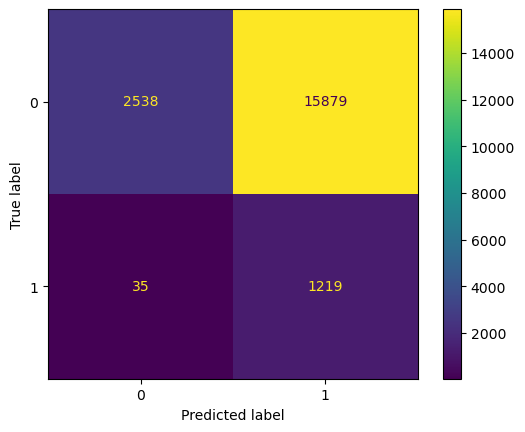

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, pred))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()